In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from lcls_beamline_toolbox.xraybeamline2d import beam1d as beam, optics1d as optics, beamline1d as beamline

In [2]:
N = 2048
FOV = 10e-3
dx = FOV/N

E0 = 14410

beam_params = {
    'photonEnergy': E0,
    'N': N,
    'sigma_x': 10e-6,
    'sigma_y': 10e-6,
    'z0x': 70,
    'z0y': 70,
    'rangeFactor': 5,
    'scaleFactor': 5,
    'z_source': 920
}

In [35]:
b1 = beam.Beam(beam_params=beam_params)

# mr1l0 = optics.FlatMirror('mr1l0', length=1, alpha=2.1e-3, z=740,delta=0e-9)
# mr2l0 = optics.FlatMirror('mr2l0', length=1, alpha=2.1e-3, z=747.286)

alphaAsym = 78.5*np.pi/180

slit = optics.Slit('slit', z=989.9, x_width=40e-6, y_width=500e-6)

crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=E0,
                          alphaAsym=-alphaAsym, orientation=2,pol='p')

# should be orientation 0
crystal2 = optics.Crystal('c2', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.1, E0=E0,alphaAsym=-alphaAsym, 
                          orientation=0,pol='p')
crystal3 = optics.Crystal('c3', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.4, E0=E0,alphaAsym=alphaAsym, orientation=0,
                         asym_type='emergence',pol='p')
# should be orientation 0
crystal4 = optics.Crystal('c4', hkl=[11,5,3], length=3e-2, width=25e-3, z=990.5, E0=E0,alphaAsym=alphaAsym, 
                          asym_type='emergence', orientation=2,pol='p')
# crystal5 = optics.Crystal('c1', hkl=[2,2,0], length=1.5e-2, z=792, E0=9500,alphaAsym=0*np.pi/180, 
#                           orientation=0)

# print('b: %.2f' % crystal2.b)
slit2 = optics.Slit('slit', z=crystal4.z+4, x_width=40e-6, y_width=500e-6)

# crl1 = optics.CRL('crlx', z=990.5, roc=7e-6)
# crl2 = optics.CRL('crly', z=990.5,orientation=1, roc=7e-6)
# slit = optics.Slit('slit', z=990.6, x_width=30e-6, y_width=100e-6)

# print(crystal.alpha*180/np.pi)
# print(crystal.beta0*180/np.pi)
print((np.sin(crystal2.beta0)/np.sin(crystal2.alpha)))
print(crystal4.alpha*180/np.pi)
# print(crystal5.alpha*180/np.pi)
print(crystal4.beta0*180/np.pi)

# Stack of 20 CRLs for tight focus
# crl_list = []
# for i in range(20):
#     crl_list.append(optics.CRL('crl%d' % i, z=800+i*1e-3,dx=0e-6, ))

# IP = optics.PPM('IP', FOV=50e-6, z=991.43, N=256)
upstream_YAG = optics.PPM('YAG1',FOV=1e-3,z=slit.z + .05, N=256)

YAG_mid = optics.PPM('YAG_mid',FOV=30e-3,z=990.2, N=256)

downstream_YAG = optics.PPM('YAG2',FOV=1e-3,z=crystal4.z + 6.5, N=256)
# downstream_YAG = optics.PPM('YAG', FOV=3e-3, z=803, N=256)


devices = [slit, slit2,upstream_YAG, downstream_YAG, YAG_mid, crystal1,crystal2,crystal3,crystal4]
# devices = devices + crl_list

XPP = beamline.Beamline(devices)

k_ix = -np.sin(crystal1.alpha)
k_iy = np.sin(0)
# k_iz = np.sqrt(1 - k_ix ** 2 - k_iy ** 2)
k_iz = np.cos(crystal1.alpha)
k_i = np.array([k_ix,k_iy,k_iz])

print(crystal1.rotation_crystal(k_i, b1.lambda0))
print(crystal1.crystal.get_Darwin_width(14410))

FWHM in x: 226.55709847605357 microns
FWHM in y: 226.55709847605357 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650835277593639
3.650835277593639
b 0.10
b 0.10
b 9.84
b 9.84
10.364866806298679
158.97993288681337
2.0895343548588126
after c1: -2.81
after c2: 0.00
after c3: 2.81
after c4: 0.00
(array([8.11070763e-07, 0.00000000e+00, 3.11836871e-07]), array([ 0.35886577,  0.        , -0.93338918]))
3.452485144369975e-06


In [36]:
print(issubclass(type(crystal1), optics.Mirror))

True


In [37]:
crystal1 = optics.Crystal('c1', hkl=[11,5,3], length=3e-2, width=25e-3, z=990, E0=14410,
                          alphaAsym=78.4*np.pi/180, orientation=2,pol='p')
print(np.sin(crystal1.beta0)/np.sin(crystal1.alpha))
print(crystal2.beta0*180/np.pi)
print(crystal3.beta0*180/np.pi)
print(crystal4.beta0*180/np.pi)

b 9.45
0.10578710568978457
158.96949411224142
2.0895343548588126
2.0895343548588126


slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.91
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.02
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809105.07
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809105.17
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809105.17
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809105.37
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8368.44
zy: 70.51
azimuth 2811.21 mrad
drift6
delta z: 0.00
zx: 8368.55
zy: 70.61
azimuth 2811.21 mrad
c4
zx: 87.35
zy: 70.61
azimuth -0.18 mrad
drift7
delta z: 0.00
zx: 91.35
zy: 74.61
azimuth -0.18 mrad
slit
zx: 91.35
zy: 74.61
azimuth -0.18 mrad
drift8
delta z: 0.00
zx: 93.85
zy: 77.11
azimuth -0.18 mrad
YAG2
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options we

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2919: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2920: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2927: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2933: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2955: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2969

<IPython.core.display.Javascript object>


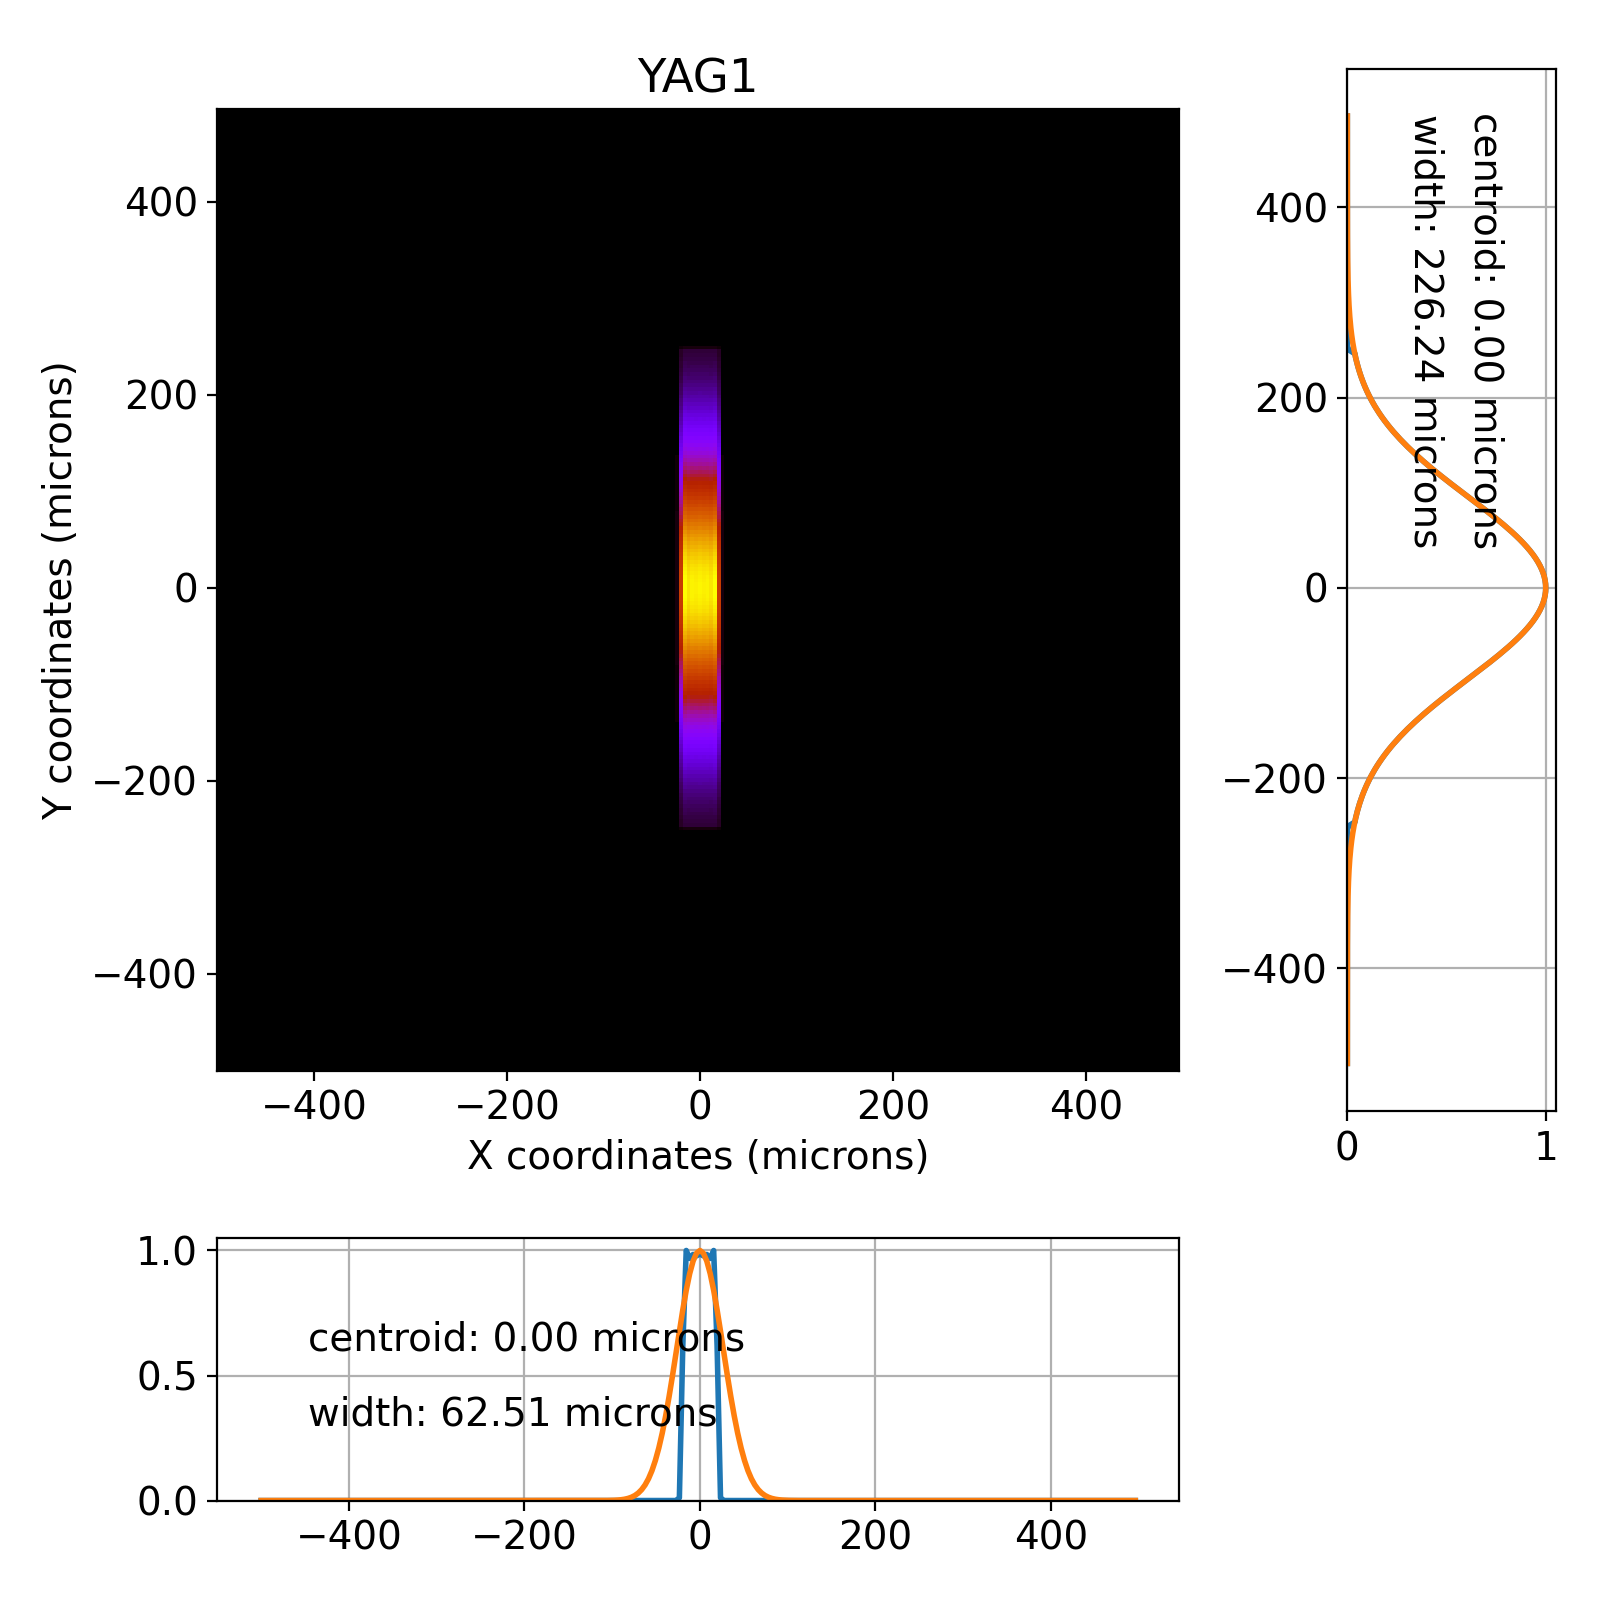

<IPython.core.display.Javascript object>


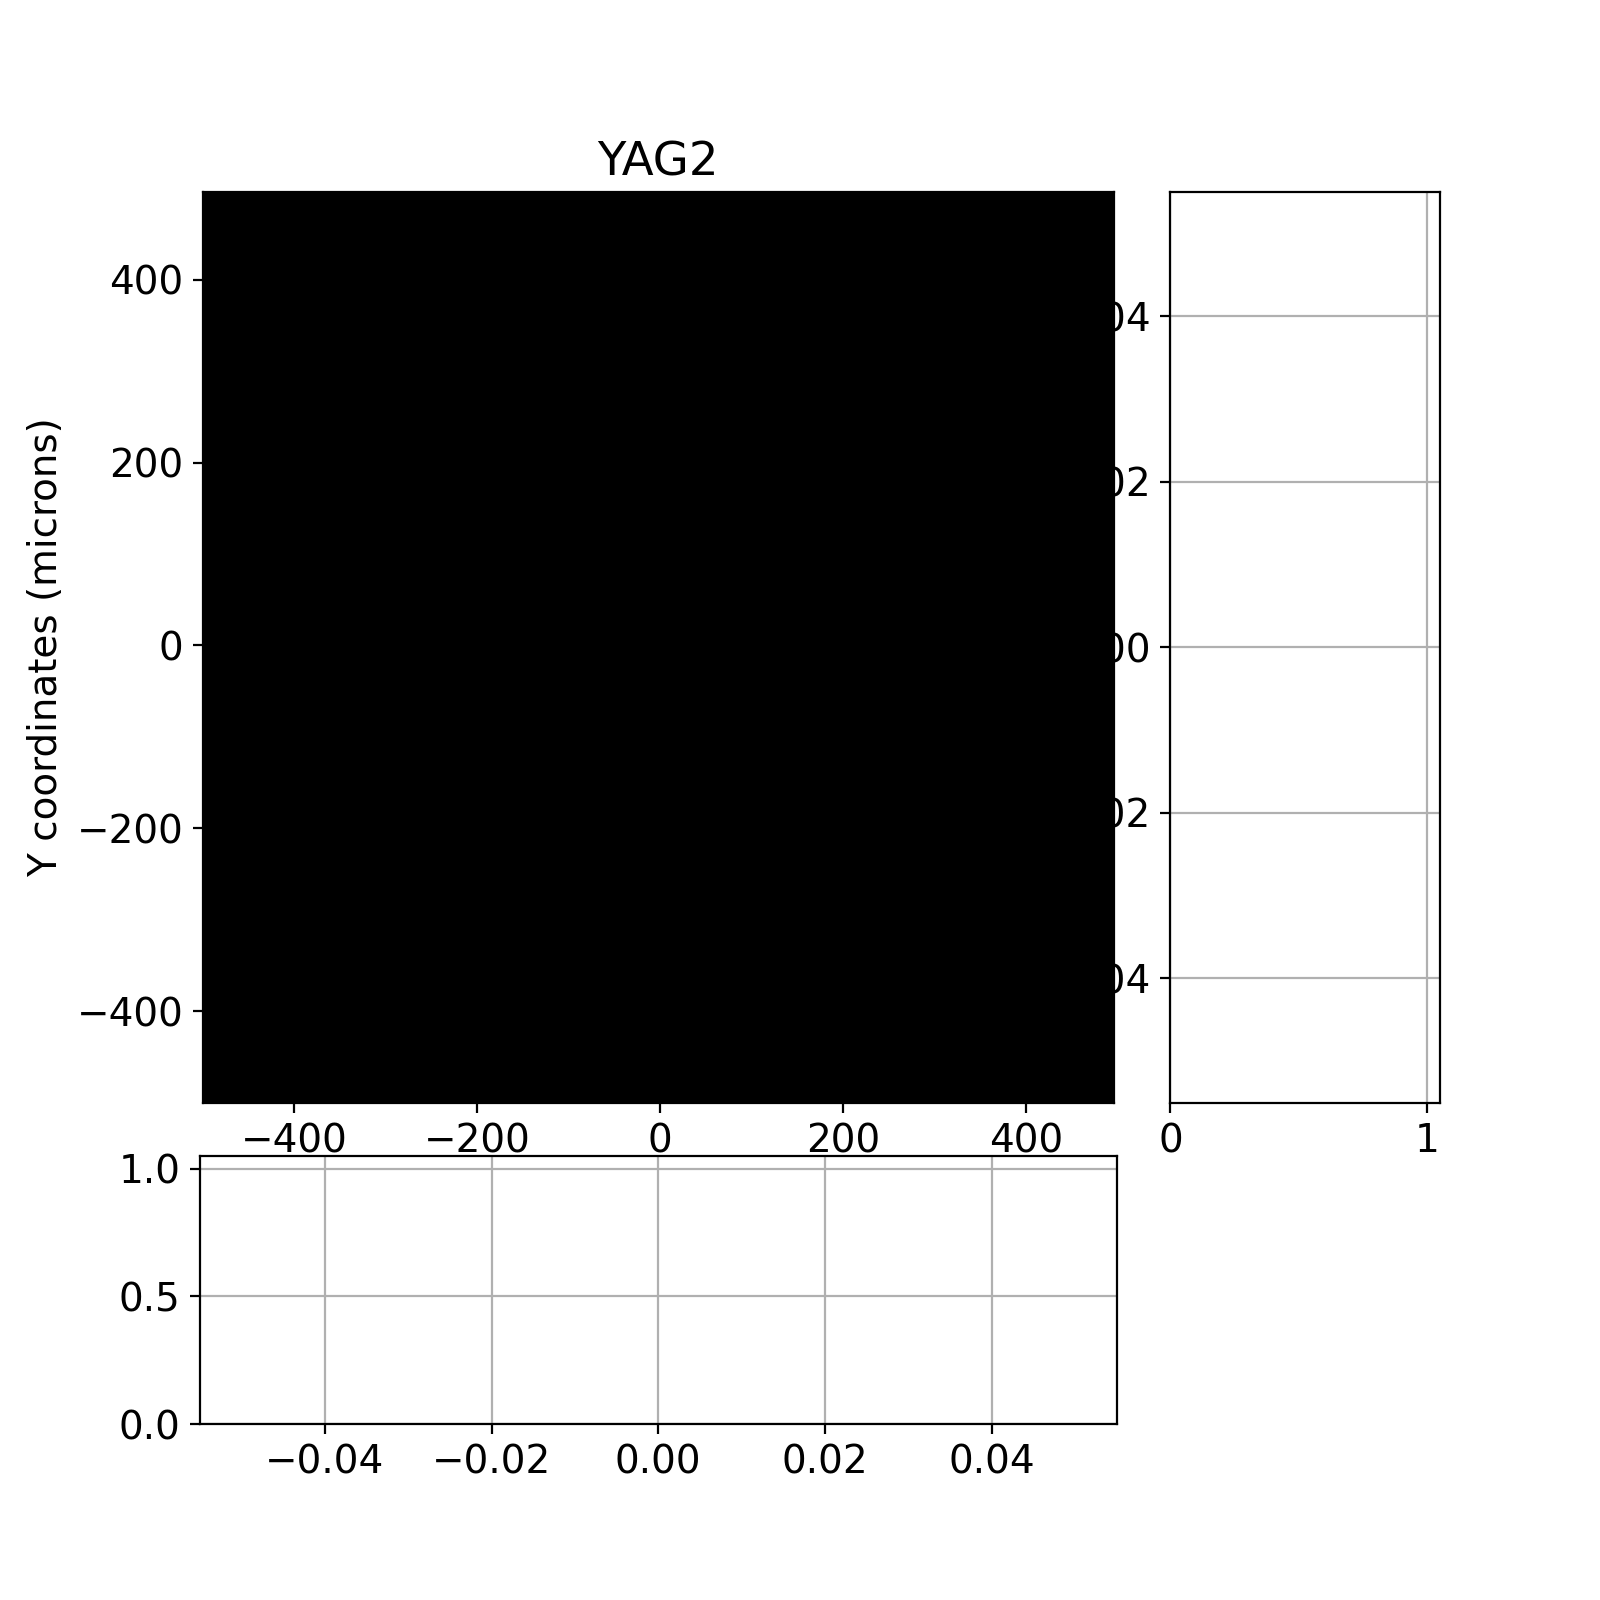

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3121: RuntimeWarning: invalid value encountered in true_divide
  ax_y.plot(self.y_lineout/np.max(self.y_lineout), self.y * 1e6)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3130: RuntimeWarning: invalid value encountered in true_divide
  ax_x.plot(self.x * 1e6, self.x_lineout/np.max(self.x_lineout))
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:3145: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  plt.tight_layout()


<IPython.core.display.Javascript object>


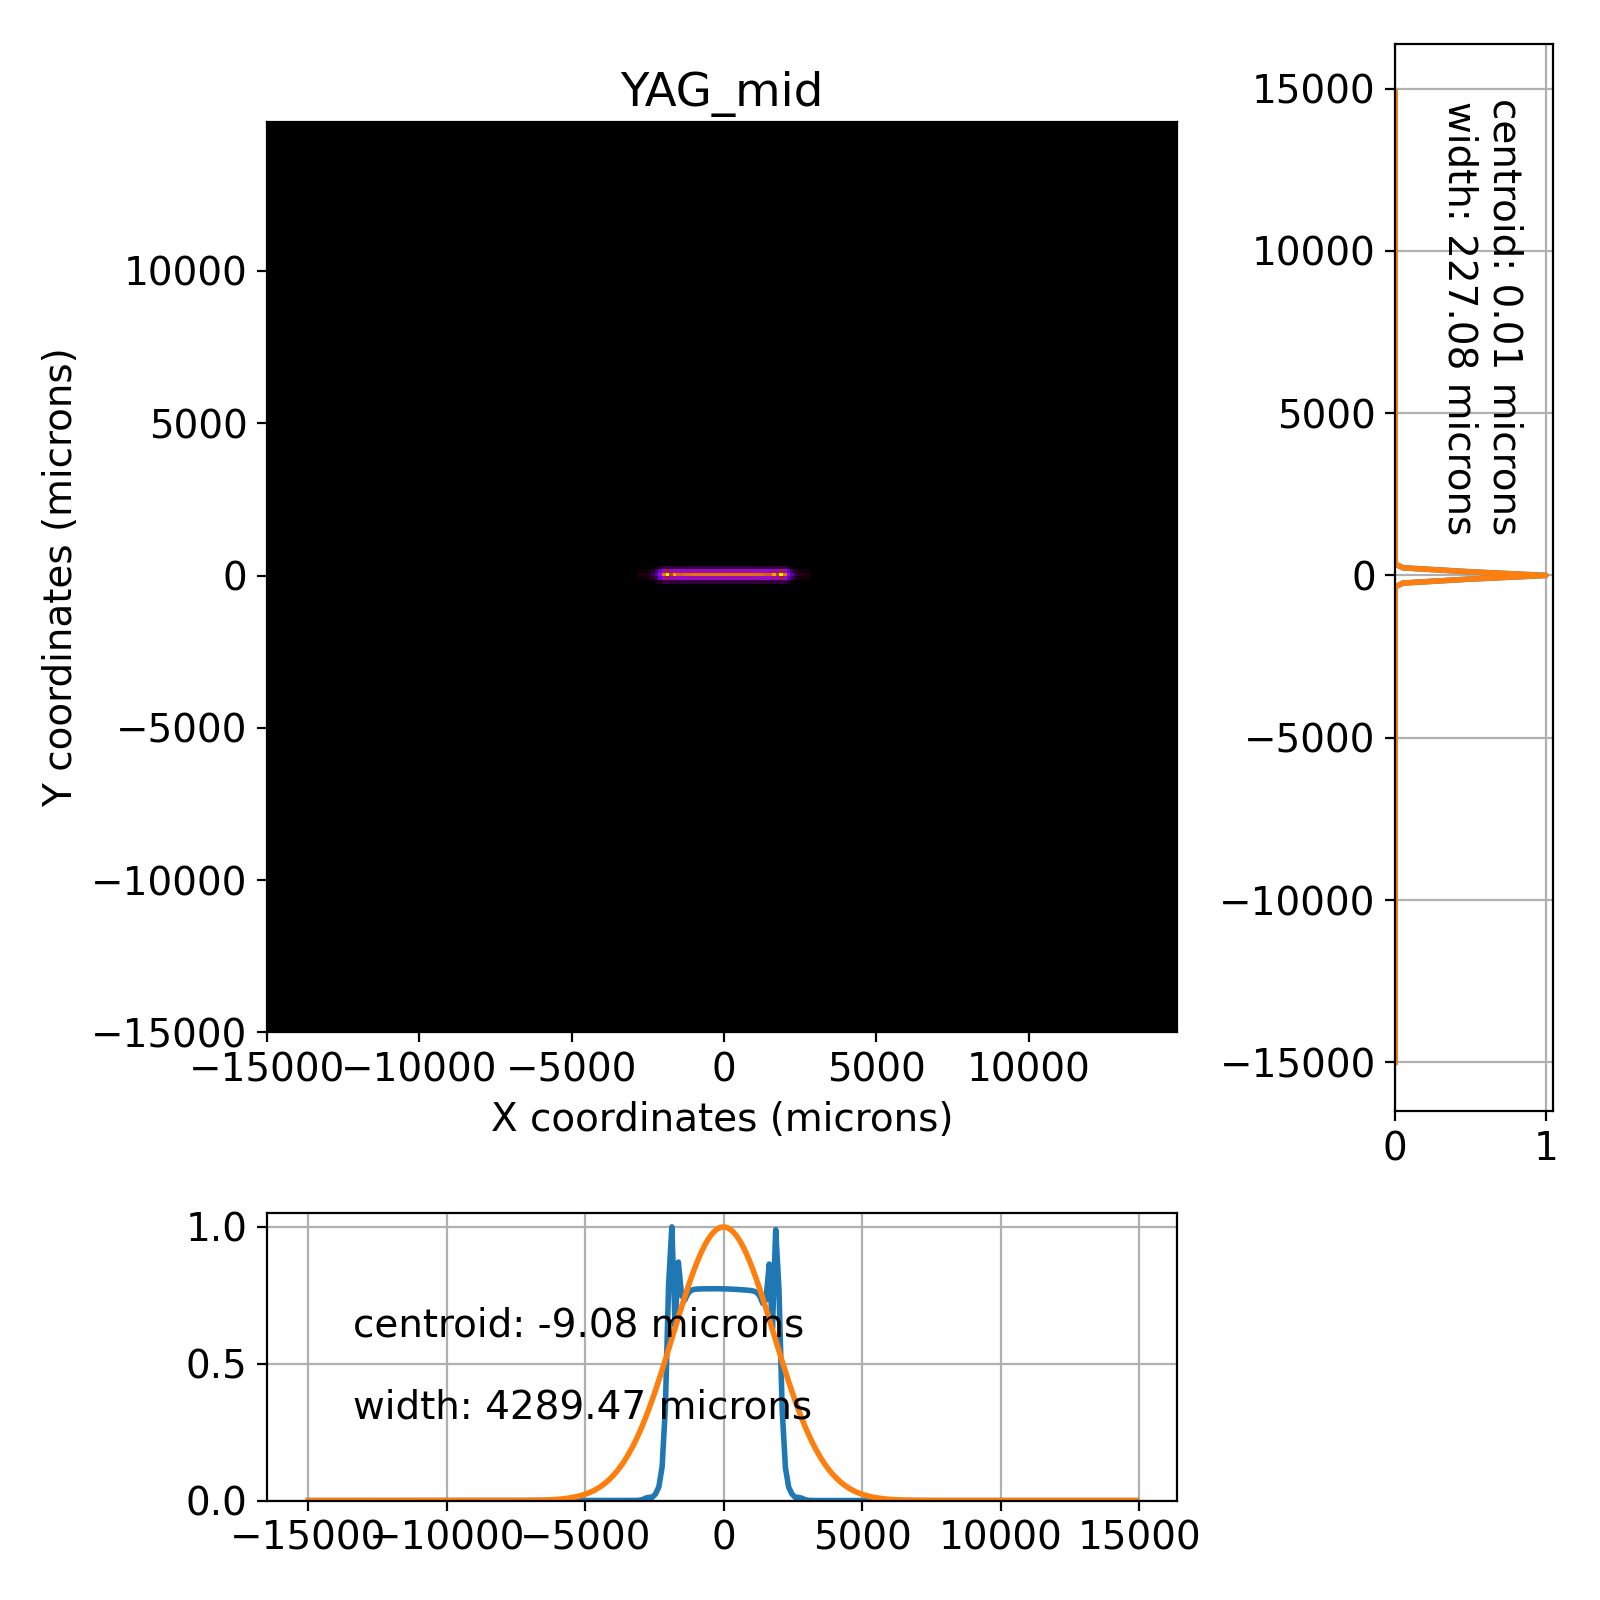

<IPython.core.display.Javascript object>


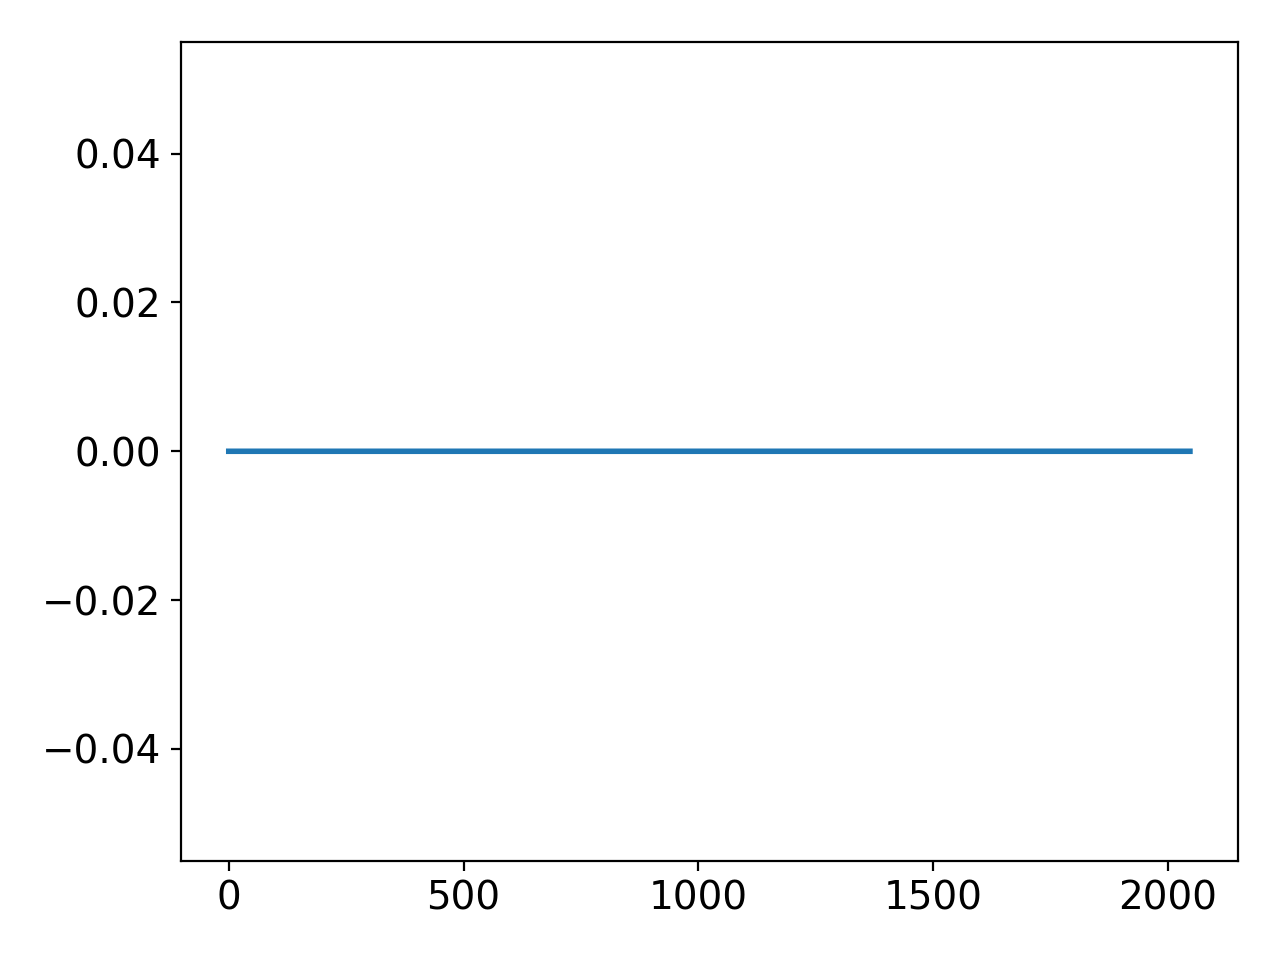

In [38]:
b2 = XPP.propagate_beamline(b1)
XPP.YAG1.view_beam()
XPP.YAG2.view_beam()
XPP.YAG_mid.view_beam()
# XPP.IP.view_beam()
# XPP.YAG.view_beam()
plt.figure()
plt.plot(np.abs(b2.wavex))

In [39]:
beam_params['photonEnergy'] = 14410

pulse_test = beam.Pulse(beam_params=beam_params, tau=2000, time_window=160000)

In [40]:
pulse_test.propagate(beamline=XPP, screen_names=['YAG1', 'YAG2','YAG_mid'])

FWHM in x: 226.5571713833326 microns
FWHM in y: 226.5571713833326 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834099540057
3.650834099540057
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.95
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809008.57
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809008.67
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809008.67
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809008.87
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8350.93
zy: 70.51
azimuth 2811.17 mrad
drift6
delta z: 0.00
zx: 8351.04
zy: 70.61
azimuth 2811.17 mrad
c4
zx: 85.41
zy: 70.61
azimuth 0.19 mrad
drift7
delta z: 0.00
zx: 89.41
zy: 74.61
azimuth 0.19 mrad
slit
zx: 89.41
zy: 74.61
azimuth 0.19 mrad
drift8
delta z: 0.00
zx: 91.91
zy: 77.11

/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2919: RuntimeWarning: invalid value encountered in true_divide
  line_x = line_x / np.max(line_x)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2920: RuntimeWarning: invalid value encountered in true_divide
  line_y = line_y / np.max(line_y)
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2927: RuntimeWarning: invalid value encountered in less
  norm_x[norm_x < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2933: RuntimeWarning: invalid value encountered in less
  norm_y[norm_y < 0] = 0
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2955: RuntimeWarning: invalid value encountered in greater
  mask = line_x > .1
/Users/seaberg/Python/lcls_beamline_toolbox/lcls_beamline_toolbox/xraybeamline2d/optics1d.py:2969

FWHM in x: 226.55717097374097 microns
FWHM in y: 226.55717097374097 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834106158336
3.650834106158336
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.95
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809009.11
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809009.21
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809009.21
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809009.41
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8351.03
zy: 70.51
azimuth 2811.17 mrad
drift6
delta z: 0.00
zx: 8351.14
zy: 70.61
azimuth 2811.17 mrad
c4
zx: 85.42
zy: 70.61
azimuth 0.18 mrad
drift7
delta z: 0.00
zx: 89.42
zy: 74.61
azimuth 0.18 mrad
slit
zx: 89.42
zy: 74.61
azimuth 0.18 mrad
drift8
delta z: 0.00
zx: 91.92
zy: 77.

zx: 91.99
zy: 77.11
azimuth 0.17 mrad
FWHM in x: 226.55716769700828 microns
FWHM in y: 226.55716769700828 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508341591045643
3.6508341591045643
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.84
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.95
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809013.44
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809013.54
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809013.54
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809013.74
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8351.82
zy: 70.51
azimuth 2811.18 mrad
drift6
delta z: 0.00
zx: 8351.92
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.50
zy: 70.61
azimuth 0.17 mrad
drift7
delta z: 0.00
zx: 89.50
zy: 74.61
azimuth 0.17 mrad
slit
zx: 89.50
zy: 74.61
azimuth 0.17 mra

zx: 809017.78
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809017.88
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809017.88
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809018.08
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8352.60
zy: 70.51
azimuth 2811.18 mrad
drift6
delta z: 0.00
zx: 8352.71
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.59
zy: 70.61
azimuth 0.15 mrad
drift7
delta z: 0.00
zx: 89.59
zy: 74.61
azimuth 0.15 mrad
slit
zx: 89.59
zy: 74.61
azimuth 0.15 mrad
drift8
delta z: 0.00
zx: 92.09
zy: 77.11
azimuth 0.15 mrad
YAG2
zx: 92.09
zy: 77.11
azimuth 0.15 mrad
FWHM in x: 226.5571640106842 microns
FWHM in y: 226.5571640106842 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834218669071
3.650834218669071
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drift3

zx: 809022.12
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809022.22
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809022.22
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809022.42
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8353.39
zy: 70.51
azimuth 2811.18 mrad
drift6
delta z: 0.00
zx: 8353.50
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.68
zy: 70.61
azimuth 0.13 mrad
drift7
delta z: 0.00
zx: 89.68
zy: 74.61
azimuth 0.13 mrad
slit
zx: 89.68
zy: 74.61
azimuth 0.13 mrad
drift8
delta z: 0.00
zx: 92.18
zy: 77.11
azimuth 0.13 mrad
YAG2
zx: 92.18
zy: 77.11
azimuth 0.13 mrad
FWHM in x: 226.5571607339518 microns
FWHM in y: 226.5571607339518 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508342716152993
3.6508342716152993
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drif

zx: 809026.45
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809026.55
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809026.55
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809026.75
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8354.18
zy: 70.51
azimuth 2811.18 mrad
drift6
delta z: 0.00
zx: 8354.28
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.77
zy: 70.61
azimuth 0.12 mrad
drift7
delta z: 0.00
zx: 89.77
zy: 74.61
azimuth 0.12 mrad
slit
zx: 89.77
zy: 74.61
azimuth 0.12 mrad
drift8
delta z: 0.00
zx: 92.27
zy: 77.11
azimuth 0.12 mrad
YAG2
zx: 92.27
zy: 77.11
azimuth 0.12 mrad
FWHM in x: 226.55715745721946 microns
FWHM in y: 226.55715745721946 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834324561528
3.650834324561528
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.85
zy: 70.10
azimuth -2809.17 mrad
drif

zx: 8355.07
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.85
zy: 70.61
azimuth 0.10 mrad
drift7
delta z: 0.00
zx: 89.85
zy: 74.61
azimuth 0.10 mrad
slit
zx: 89.85
zy: 74.61
azimuth 0.10 mrad
drift8
delta z: 0.00
zx: 92.35
zy: 77.11
azimuth 0.10 mrad
YAG2
zx: 92.35
zy: 77.11
azimuth 0.10 mrad
FWHM in x: 226.55715418048715 microns
FWHM in y: 226.55715418048715 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508343775077567
3.6508343775077567
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.86
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.96
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809031.34
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809031.44
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809031.44
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809031.64
zy: 70.51
azimuth 0.00 mrad
c

FWHM in x: 226.55715090375503 microns
FWHM in y: 226.55715090375503 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834430453985
3.650834430453985
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.86
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.97
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809035.67
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809035.77
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809035.77
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809035.97
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8355.85
zy: 70.51
azimuth 2811.18 mrad
drift6
delta z: 0.00
zx: 8355.96
zy: 70.61
azimuth 2811.18 mrad
c4
zx: 85.95
zy: 70.61
azimuth 0.08 mrad
drift7
delta z: 0.00
zx: 89.95
zy: 74.61
azimuth 0.08 mrad
slit
zx: 89.95
zy: 74.61
azimuth 0.08 mrad
drift8
delta z: 0.00
zx: 92.45
zy: 77.

zx: 8356.74
zy: 70.61
azimuth 2811.19 mrad
c4
zx: 86.04
zy: 70.61
azimuth 0.06 mrad
drift7
delta z: 0.00
zx: 90.04
zy: 74.61
azimuth 0.06 mrad
slit
zx: 90.04
zy: 74.61
azimuth 0.06 mrad
drift8
delta z: 0.00
zx: 92.54
zy: 77.11
azimuth 0.06 mrad
YAG2
zx: 92.54
zy: 77.11
azimuth 0.06 mrad
FWHM in x: 226.5571472174315 microns
FWHM in y: 226.5571472174315 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508344900184917
3.6508344900184917
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.86
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.97
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809040.55
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809040.65
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809040.65
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809040.85
zy: 70.51
azimuth 0.00 mrad
c3


slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.87
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.97
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809044.89
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809044.99
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809044.99
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809045.19
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8357.52
zy: 70.51
azimuth 2811.19 mrad
drift6
delta z: 0.00
zx: 8357.63
zy: 70.61
azimuth 2811.19 mrad
c4
zx: 86.14
zy: 70.61
azimuth 0.05 mrad
drift7
delta z: 0.00
zx: 90.14
zy: 74.61
azimuth 0.05 mrad
slit
zx: 90.14
zy: 74.61
azimuth 0.05 mrad
drift8
delta z: 0.00
zx: 92.64
zy: 77.11
azimuth 0.05 mrad
YAG2
zx: 92.64
zy: 77.11
azimuth 0.05 mrad
FWHM in x: 226.55714353110804 microns
FWHM in y: 226.55714353110804 microns
FWHM Divergence (x): 3.2 μrad
FW

zx: 809049.32
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809049.52
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8358.31
zy: 70.51
azimuth 2811.19 mrad
drift6
delta z: 0.00
zx: 8358.42
zy: 70.61
azimuth 2811.19 mrad
c4
zx: 86.23
zy: 70.61
azimuth 0.03 mrad
drift7
delta z: 0.00
zx: 90.23
zy: 74.61
azimuth 0.03 mrad
slit
zx: 90.23
zy: 74.61
azimuth 0.03 mrad
drift8
delta z: 0.00
zx: 92.73
zy: 77.11
azimuth 0.03 mrad
YAG2
zx: 92.73
zy: 77.11
azimuth 0.03 mrad
FWHM in x: 226.55714025437618 microns
FWHM in y: 226.55714025437618 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834602529227
3.650834602529227
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.87
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.98
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809049.76
zy: 70.21
azimuth 0.00 mrad
drift4


zx: 90.31
zy: 74.61
azimuth 0.01 mrad
slit
zx: 90.31
zy: 74.61
azimuth 0.01 mrad
drift8
delta z: 0.00
zx: 92.81
zy: 77.11
azimuth 0.01 mrad
YAG2
zx: 92.81
zy: 77.11
azimuth 0.01 mrad
FWHM in x: 226.55713697764443 microns
FWHM in y: 226.55713697764443 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508346554754554
3.6508346554754554
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.87
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.98
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809054.10
zy: 70.21
azimuth 0.00 mrad
drift4
delta z: 0.00
zx: 809054.20
zy: 70.31
azimuth 0.00 mrad
YAG_mid
zx: 809054.20
zy: 70.31
azimuth 0.00 mrad
drift5
delta z: 0.00
zx: 809054.40
zy: 70.51
azimuth 0.00 mrad
c3
zx: 8359.19
zy: 70.51
azimuth 2811.19 mrad
drift6
delta z: 0.00
zx: 8359.30
zy: 70.61
azimuth 2811.19 m

delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.88
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.98
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809058.44
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809058.54
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809058.54
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809058.74
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8359.98
zy: 70.51
azimuth 2811.19 mrad
drift6
delta z: 0.00
zx: 8360.09
zy: 70.61
azimuth 2811.19 mrad
c4
zx: 86.41
zy: 70.61
azimuth -0.01 mrad
drift7
delta z: 0.00
zx: 90.41
zy: 74.61
azimuth -0.01 mrad
slit
zx: 90.41
zy: 74.61
azimuth -0.01 mrad
drift8
delta z: 0.00
zx: 92.91
zy: 77.11
azimuth -0.01 mrad
YAG2
zx: 92.91
zy: 77.11
azimuth -0.01 mrad
FWHM in x: 226.55713329132132 microns
FWHM in y: 226.55713329132132 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.65083471503

zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.88
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.99
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809062.78
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809062.88
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809062.88
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809063.08
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8360.77
zy: 70.51
azimuth 2811.19 mrad
drift6
delta z: 0.00
zx: 8360.87
zy: 70.61
azimuth 2811.19 mrad
c4
zx: 86.50
zy: 70.61
azimuth -0.02 mrad
drift7
delta z: 0.00
zx: 90.50
zy: 74.61
azimuth -0.02 mrad
slit
zx: 90.50
zy: 74.61
azimuth -0.02 mrad
drift8
delta z: 0.00
zx: 93.00
zy: 77.11
azimuth -0.02 mrad
YAG2
zx: 93.00
zy: 77.11
azimuth -0.02 mrad
FWHM in x: 226.5571300145898 microns
FWHM in y: 226.5571300145898 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508347679861908
3.6508347679861908
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0

zx: 7530.99
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809067.12
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809067.22
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809067.22
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809067.42
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8361.56
zy: 70.51
azimuth 2811.20 mrad
drift6
delta z: 0.00
zx: 8361.66
zy: 70.61
azimuth 2811.20 mrad
c4
zx: 86.59
zy: 70.61
azimuth -0.04 mrad
drift7
delta z: 0.00
zx: 90.59
zy: 74.61
azimuth -0.04 mrad
slit
zx: 90.59
zy: 74.61
azimuth -0.04 mrad
drift8
delta z: 0.00
zx: 93.09
zy: 77.11
azimuth -0.04 mrad
YAG2
zx: 93.09
zy: 77.11
azimuth -0.04 mrad
FWHM in x: 226.55712673785837 microns
FWHM in y: 226.55712673785837 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650834820932419
3.650834820932419
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 

zx: 809071.55
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809071.55
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809071.75
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8362.34
zy: 70.51
azimuth 2811.20 mrad
drift6
delta z: 0.00
zx: 8362.45
zy: 70.61
azimuth 2811.20 mrad
c4
zx: 86.67
zy: 70.61
azimuth -0.06 mrad
drift7
delta z: 0.00
zx: 90.67
zy: 74.61
azimuth -0.06 mrad
slit
zx: 90.67
zy: 74.61
azimuth -0.06 mrad
drift8
delta z: 0.00
zx: 93.17
zy: 77.11
azimuth -0.06 mrad
YAG2
zx: 93.17
zy: 77.11
azimuth -0.06 mrad
FWHM in x: 226.557123461127 microns
FWHM in y: 226.557123461127 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508348738786482
3.6508348738786482
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7530.99
zy: 70.21
azimuth -2809.17 m

zx: 86.76
zy: 70.61
azimuth -0.07 mrad
drift7
delta z: 0.00
zx: 90.76
zy: 74.61
azimuth -0.07 mrad
slit
zx: 90.76
zy: 74.61
azimuth -0.07 mrad
drift8
delta z: 0.00
zx: 93.26
zy: 77.11
azimuth -0.07 mrad
YAG2
zx: 93.26
zy: 77.11
azimuth -0.07 mrad
FWHM in x: 226.55712018439579 microns
FWHM in y: 226.55712018439579 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508349268248765
3.6508349268248765
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.00
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809076.33
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809076.43
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809076.43
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809076.63
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8363.23
zy: 70.51
azimuth 2811.

zx: 809080.77
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809080.97
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8364.01
zy: 70.51
azimuth 2811.20 mrad
drift6
delta z: 0.00
zx: 8364.12
zy: 70.61
azimuth 2811.20 mrad
c4
zx: 86.86
zy: 70.61
azimuth -0.09 mrad
drift7
delta z: 0.00
zx: 90.86
zy: 74.61
azimuth -0.09 mrad
slit
zx: 90.86
zy: 74.61
azimuth -0.09 mrad
drift8
delta z: 0.00
zx: 93.36
zy: 77.11
azimuth -0.09 mrad
YAG2
zx: 93.36
zy: 77.11
azimuth -0.09 mrad
FWHM in x: 226.55711649807316 microns
FWHM in y: 226.55711649807316 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508349863893836
3.6508349863893836
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.89
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.00
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809081.21
zy: 70.21
azimuth -0.00 mr

zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.00
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809085.55
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809085.65
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809085.65
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809085.85
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8364.90
zy: 70.51
azimuth 2811.20 mrad
drift6
delta z: 0.00
zx: 8365.01
zy: 70.61
azimuth 2811.20 mrad
c4
zx: 86.96
zy: 70.61
azimuth -0.11 mrad
drift7
delta z: 0.00
zx: 90.96
zy: 74.61
azimuth -0.11 mrad
slit
zx: 90.96
zy: 74.61
azimuth -0.11 mrad
drift8
delta z: 0.00
zx: 93.46
zy: 77.11
azimuth -0.11 mrad
YAG2
zx: 93.46
zy: 77.11
azimuth -0.11 mrad
FWHM in x: 226.55711281175078 microns
FWHM in y: 226.55711281175078 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.65083504595389
3.65083504

zx: 809090.19
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8365.69
zy: 70.51
azimuth 2811.20 mrad
drift6
delta z: 0.00
zx: 8365.79
zy: 70.61
azimuth 2811.20 mrad
c4
zx: 87.05
zy: 70.61
azimuth -0.13 mrad
drift7
delta z: 0.00
zx: 91.05
zy: 74.61
azimuth -0.13 mrad
slit
zx: 91.05
zy: 74.61
azimuth -0.13 mrad
drift8
delta z: 0.00
zx: 93.55
zy: 77.11
azimuth -0.13 mrad
YAG2
zx: 93.55
zy: 77.11
azimuth -0.13 mrad
FWHM in x: 226.5571095350198 microns
FWHM in y: 226.5571095350198 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508350989001186
3.6508350989001186
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.01
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809090.43
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809090.53
zy: 70.31
azimuth -0.00 mrad

FWHM in x: 226.5571062582889 microns
FWHM in y: 226.5571062582889 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.6508351518463473
3.6508351518463473
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.90
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.01
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809094.77
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809094.87
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809094.87
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809095.07
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8366.57
zy: 70.51
azimuth 2811.21 mrad
drift6
delta z: 0.00
zx: 8366.68
zy: 70.61
azimuth 2811.21 mrad
c4
zx: 87.15
zy: 70.61
azimuth -0.15 mrad
drift7
delta z: 0.00
zx: 91.15
zy: 74.61
azimuth -0.15 mrad
slit
zx: 91.15
zy: 74.61
azimuth -0.15 mrad
drift8
delta z: 0.00
zx: 93.65


zx: 8367.47
zy: 70.61
azimuth 2811.21 mrad
c4
zx: 87.23
zy: 70.61
azimuth -0.16 mrad
drift7
delta z: 0.00
zx: 91.23
zy: 74.61
azimuth -0.16 mrad
slit
zx: 91.23
zy: 74.61
azimuth -0.16 mrad
drift8
delta z: 0.00
zx: 93.73
zy: 77.11
azimuth -0.16 mrad
YAG2
zx: 93.73
zy: 77.11
azimuth -0.16 mrad
FWHM in x: 226.55710257196685 microns
FWHM in y: 226.55710257196685 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650835211410854
3.650835211410854
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.91
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.01
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809099.65
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809099.75
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809099.75
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809099.95
zy: 70.51
azimuth -0.00

zx: 93.83
zy: 77.11
azimuth -0.18 mrad
YAG2
Some of the data contained NaNs or options were incompatible. Using second moment for width.
Some of the data contained NaNs or options were incompatible. Using second moment for width.
zx: 93.83
zy: 77.11
azimuth -0.18 mrad
FWHM in x: 226.55709888564485 microns
FWHM in y: 226.55709888564485 microns
FWHM Divergence (x): 3.2 μrad
FWHM Divergence (y): 3.2 μrad
3.650835270975361
3.650835270975361
slit
zx: 70.00
zy: 70.00
azimuth 0.00 mrad
drift1
delta z: 0.00
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
YAG1
zx: 70.05
zy: 70.05
azimuth 0.00 mrad
drift2
delta z: 0.00
zx: 70.10
zy: 70.10
azimuth 0.00 mrad
c1
zx: 7530.91
zy: 70.10
azimuth -2809.17 mrad
drift3
delta z: 0.00
zx: 7531.01
zy: 70.21
azimuth -2809.17 mrad
c2
zx: 809104.53
zy: 70.21
azimuth -0.00 mrad
drift4
delta z: 0.00
zx: 809104.63
zy: 70.31
azimuth -0.00 mrad
YAG_mid
zx: 809104.63
zy: 70.31
azimuth -0.00 mrad
drift5
delta z: 0.00
zx: 809104.83
zy: 70.51
azimuth -0.00 mrad
c3
zx: 8368.34
zy:

<IPython.core.display.Javascript object>


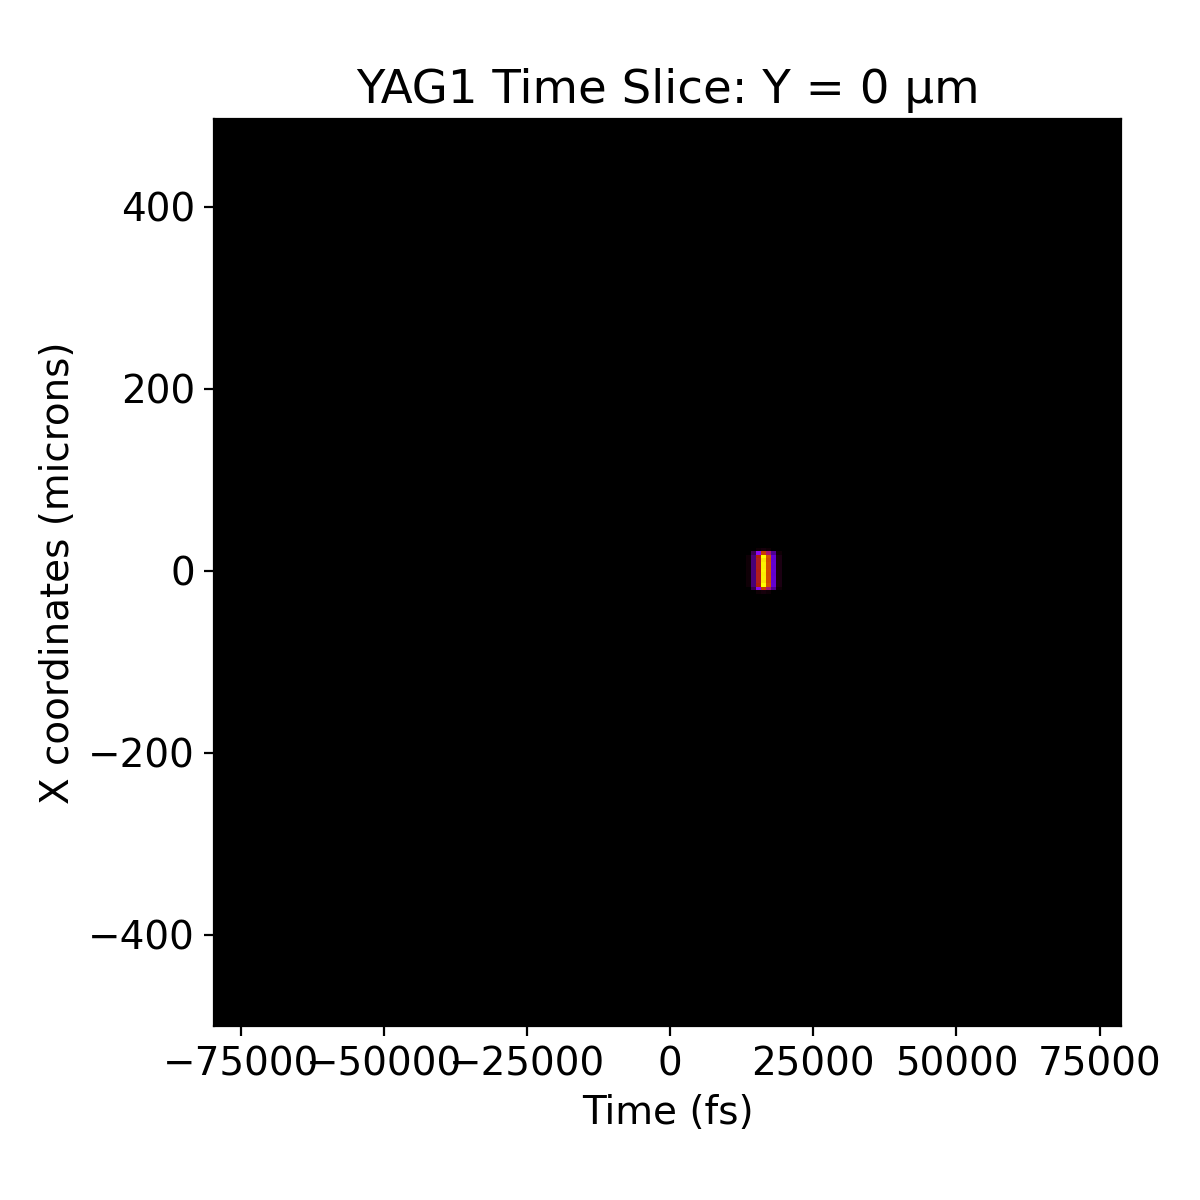

128


<IPython.core.display.Javascript object>


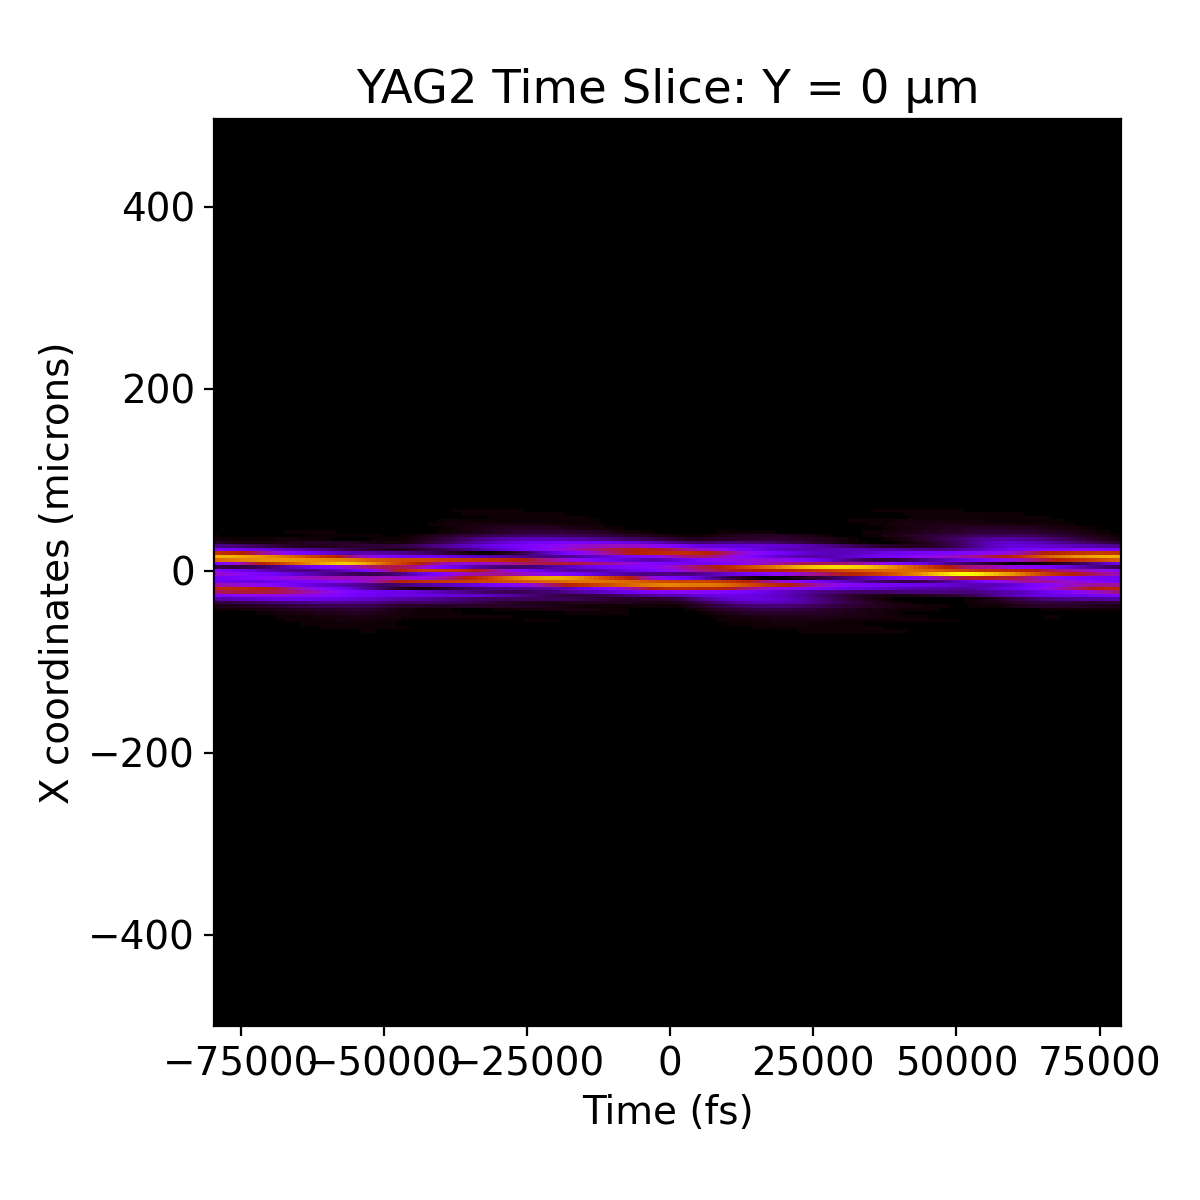

128


<IPython.core.display.Javascript object>


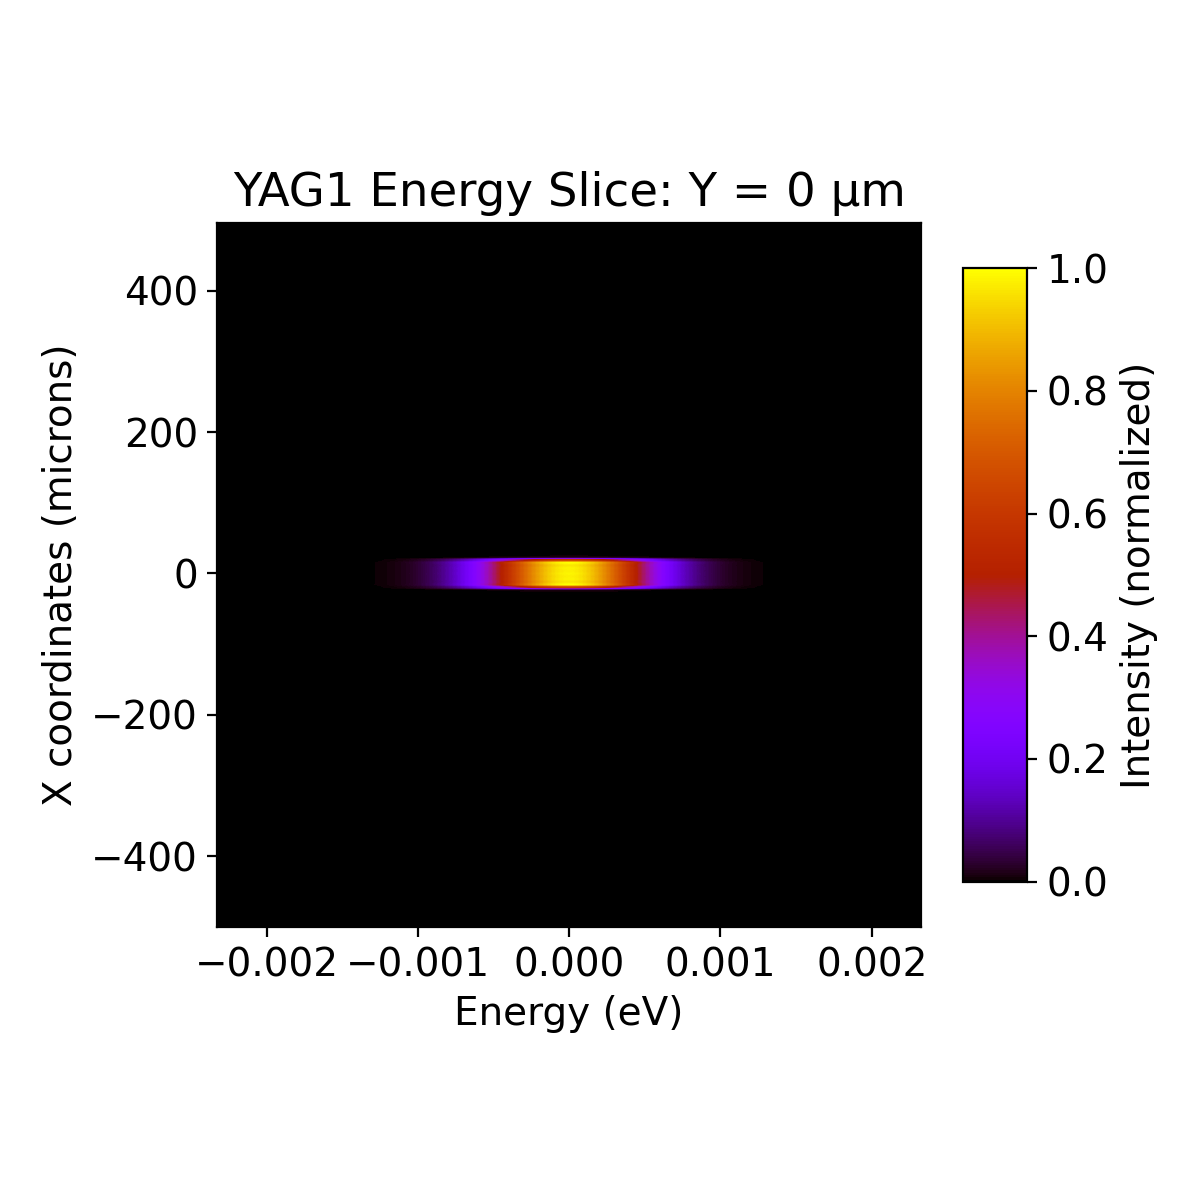

<IPython.core.display.Javascript object>


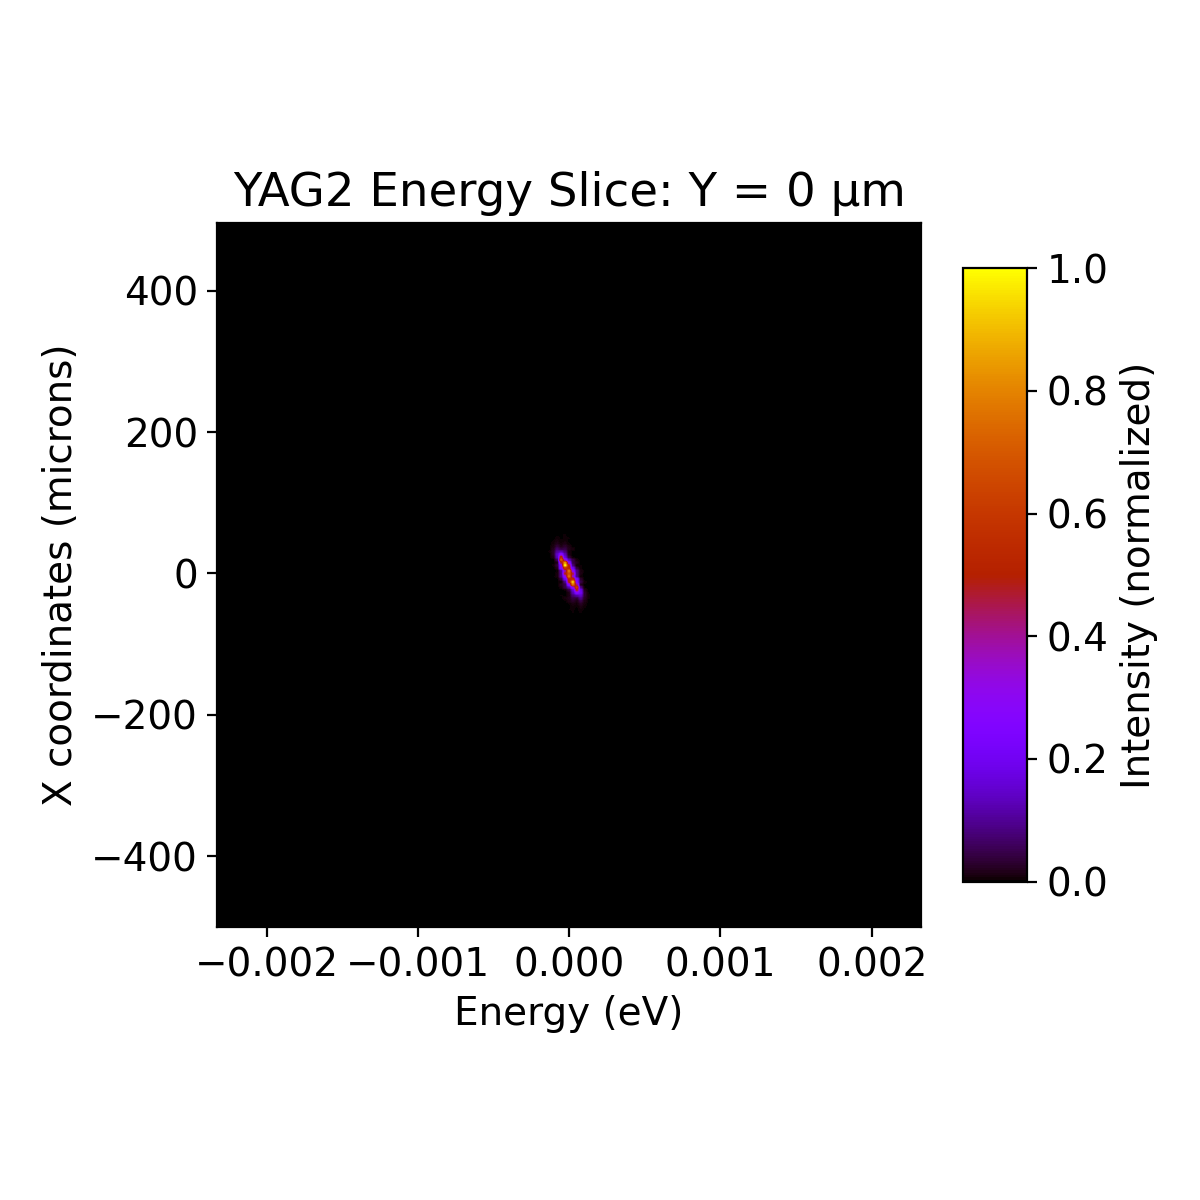

<IPython.core.display.Javascript object>


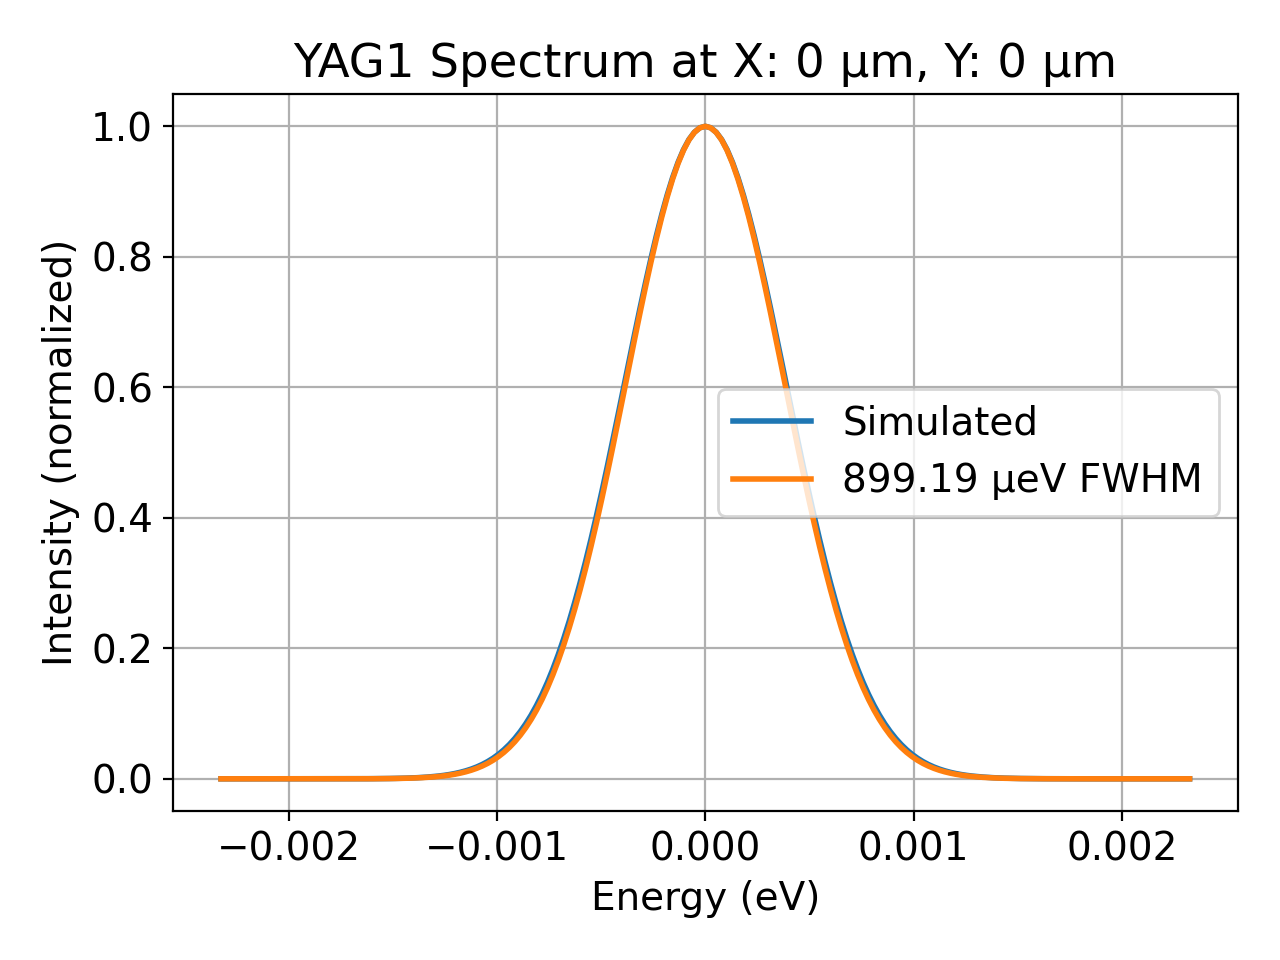

<IPython.core.display.Javascript object>


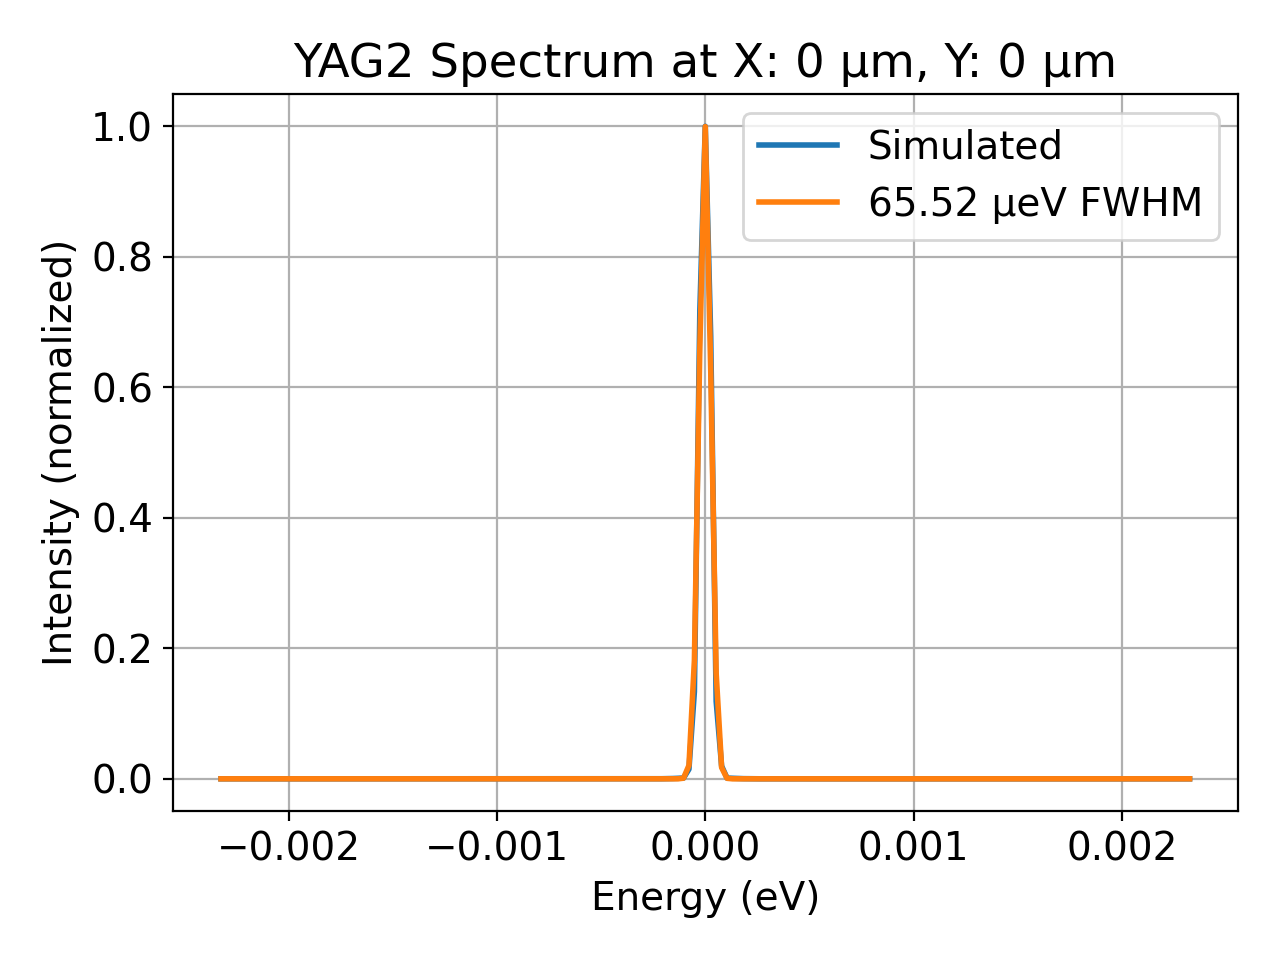

<IPython.core.display.Javascript object>


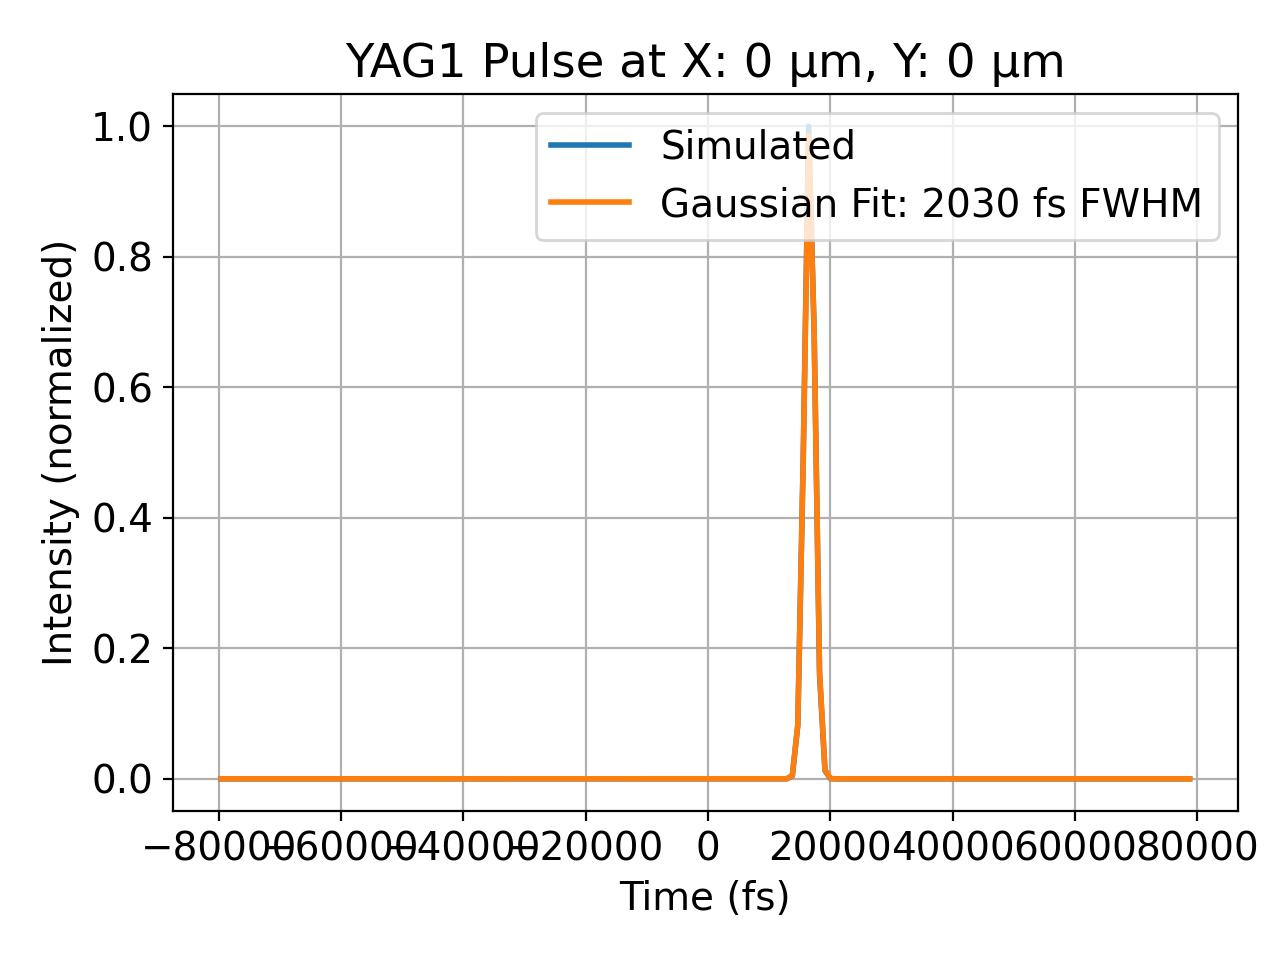

<IPython.core.display.Javascript object>


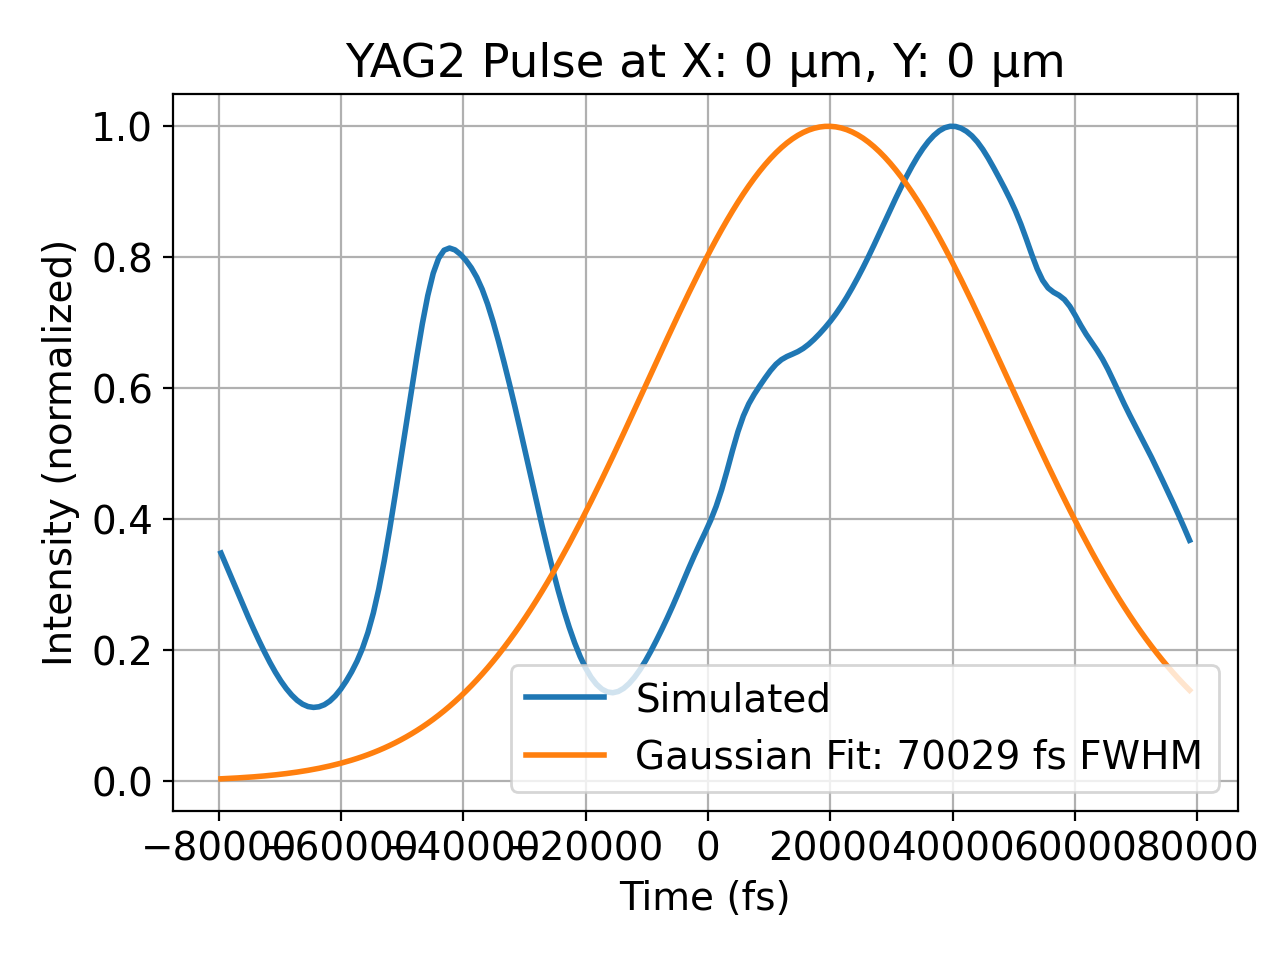

<IPython.core.display.Javascript object>


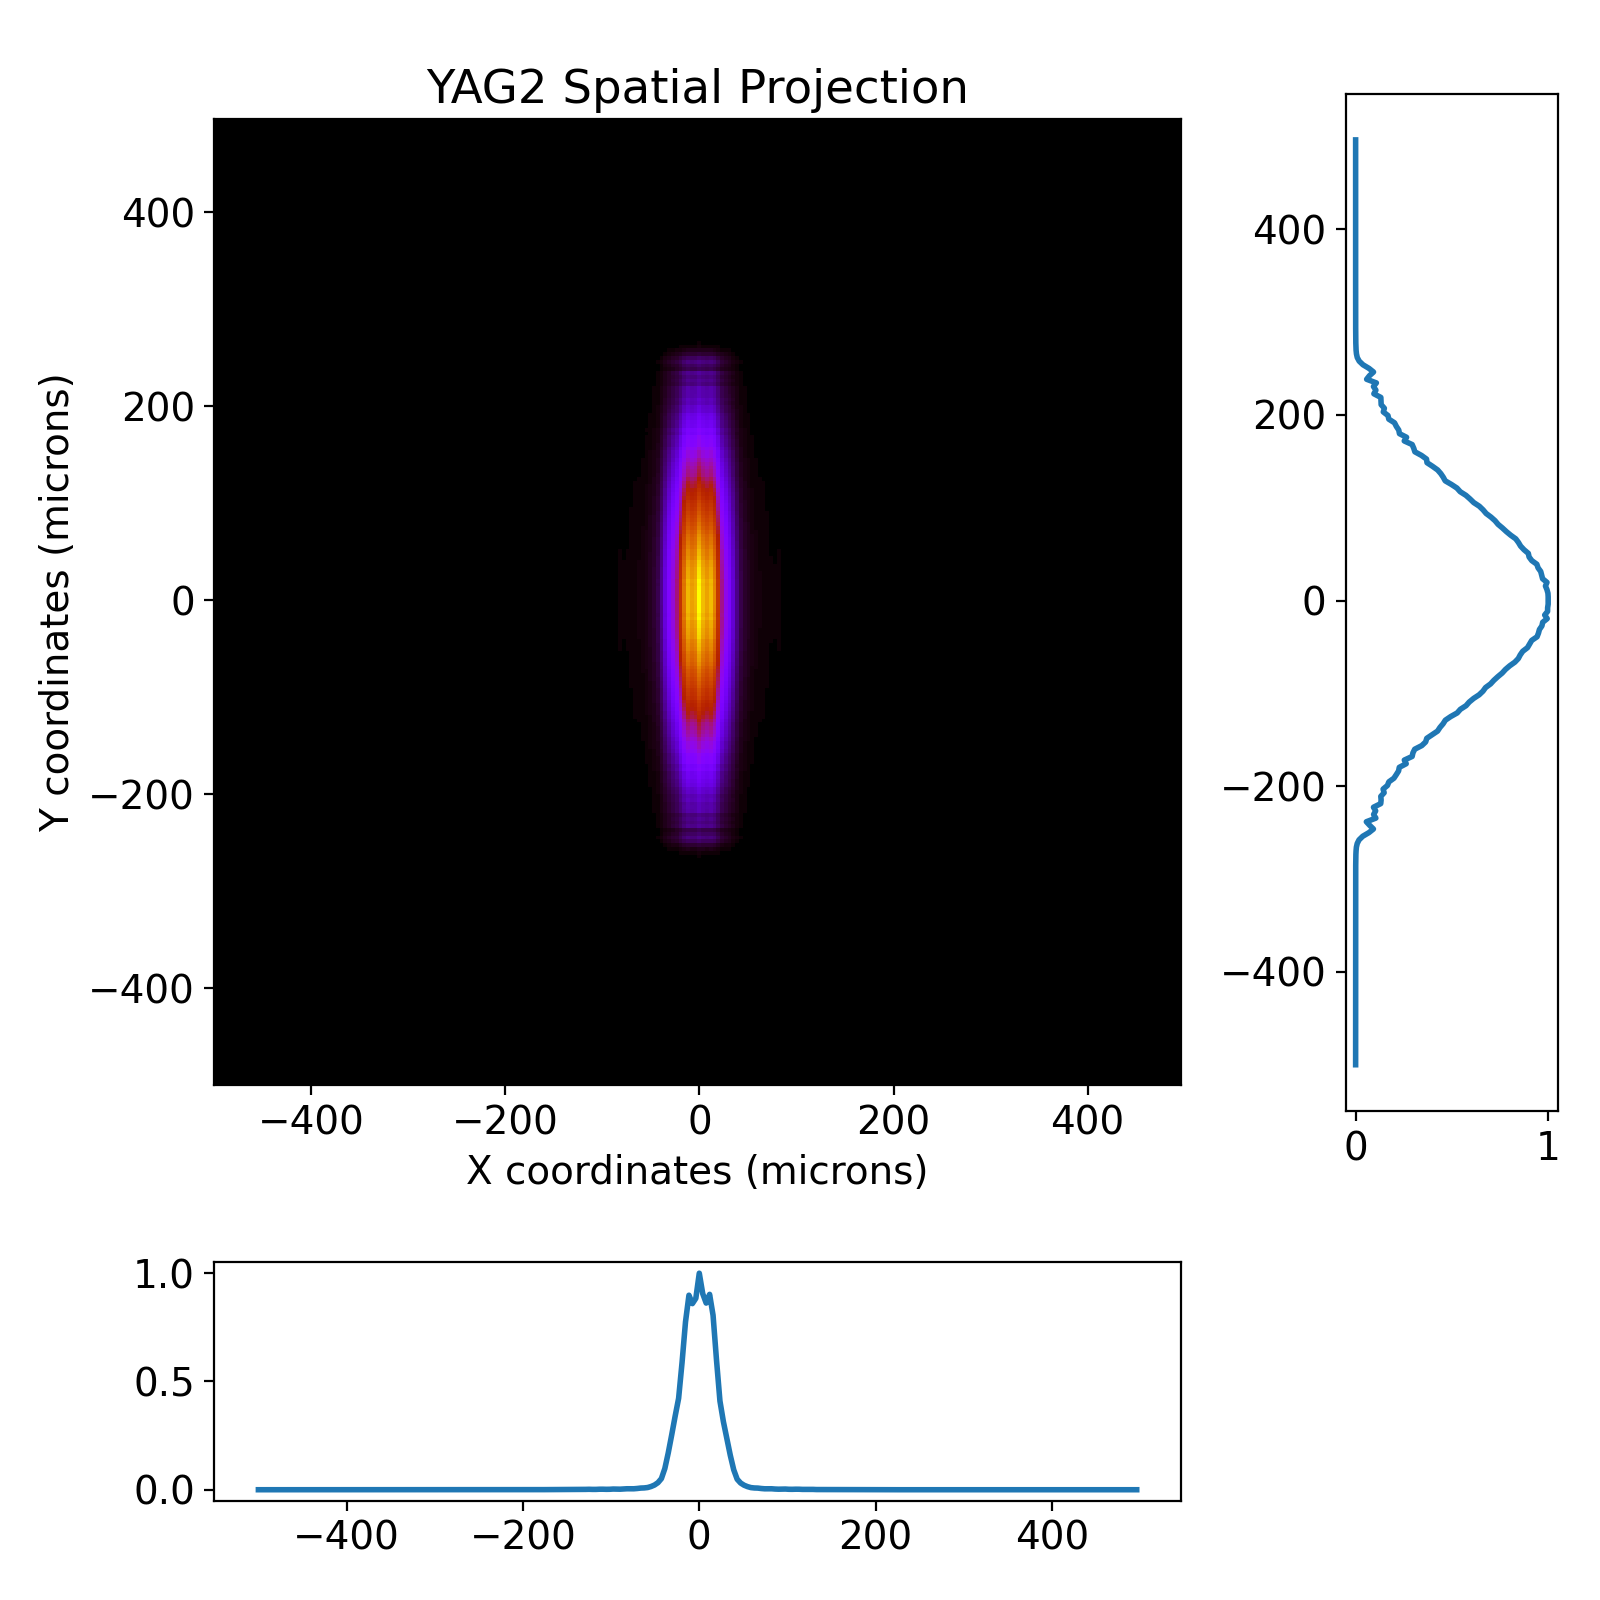

In [41]:
# pulse_test.imshow_time_slice('YAG_mid')
# pulse_test.imshow_energy_slice('YAG_mid')
pulse_test.imshow_time_slice('YAG1')
pulse_test.imshow_time_slice('YAG2')
pulse_test.imshow_energy_slice('YAG1')
pulse_test.imshow_energy_slice('YAG2')
pulse_test.plot_spectrum('YAG1')
pulse_test.plot_spectrum('YAG2',x_pos=0)
pulse_test.plot_pulse('YAG1')
pulse_test.plot_pulse('YAG2')
# pulse_test.imshow_energy_slice('IP')
pulse_test.imshow_projection('YAG2')
# pulse_test.imshow_time_slice('IP')

<IPython.core.display.Javascript object>


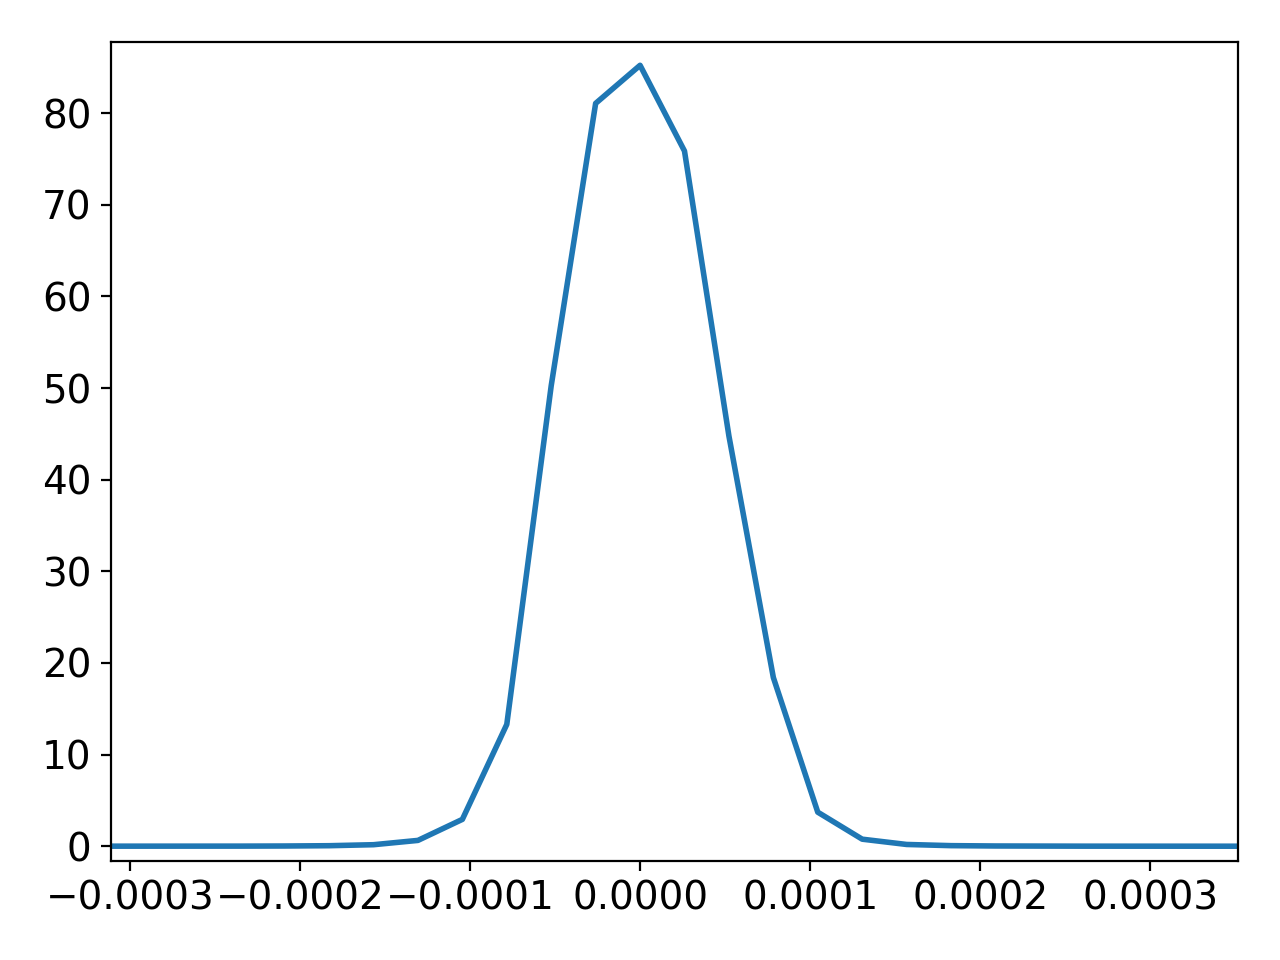

In [42]:
y_data = np.sum(np.abs(pulse_test.energy_stacks['YAG2'][128,:,:]),axis=0)**2
plt.figure()
plt.plot(pulse_test.energy-14410,y_data)

In [8]:
(760-343)/180

2.316666666666667

In [33]:
(430-70)/350

1.0285714285714285

In [38]:
(430-90)/300

1.1333333333333333

In [16]:
(90+170)/480

0.5416666666666666

In [21]:
(680-512)/60

2.8